<a href="https://colab.research.google.com/github/naveen-crypt3/ItemCategorization/blob/main/FoodClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("/content/sample_data/FoodList1.xlsx")
food_description = data["Food"]

In [ ]:
vectorizer = TfidfVectorizer()
features_vectorized = vectorizer.fit_transform(food_description)

In [ ]:
target_cuisine = data["Cuisine"]
target_dietary = data["Dietary Preference"]
target_meal_course = data["Meal Course"]
target_prepare=data["Preparation Method"]
target_main=data["Main Ingredient"]

X_train, X_test, y_train_cuisine, y_test_cuisine = train_test_split(features_vectorized, target_cuisine, test_size=0.2, random_state=42)
X_train, X_test, y_train_dietary, y_test_dietary = train_test_split(features_vectorized, target_dietary, test_size=0.2, random_state=42)
X_train, X_test, y_train_meal_course, y_test_meal_course = train_test_split(features_vectorized, target_meal_course, test_size=0.2, random_state=42)
X_train, X_test, y_train_prepare, y_test_prepare = train_test_split(features_vectorized, target_prepare, test_size=0.2, random_state=42)
X_train, X_test, y_train_main, y_test_main = train_test_split(features_vectorized, target_main, test_size=0.2, random_state=42)

In [ ]:
model_cuisine = RandomForestClassifier()
model_cuisine.fit(X_train, y_train_cuisine)

model_prepare = RandomForestClassifier()
model_prepare.fit(X_train,y_train_prepare)

model_dietary = RandomForestClassifier()
model_dietary.fit(X_train, y_train_dietary)

model_meal_course = RandomForestClassifier()
model_meal_course.fit(X_train, y_train_meal_course)

model_main = RandomForestClassifier()
model_main.fit(X_train, y_train_main)

RandomForestClassifier()

In [ ]:
def predict_food_details(food_item):
  user_features = vectorizer.transform([food_item.lower()])
  predicted_cuisine = model_cuisine.predict(user_features)[0]
  predicted_dietary = model_dietary.predict(user_features)[0]
  predicted_meal_course = model_meal_course.predict(user_features)[0]
  predicted_prepare = model_prepare.predict(user_features)[0]
  predicted_main = model_main.predict(user_features)[0]
  return {
      "Food": food_item,
      "Cuisine": predicted_cuisine,
      "Dietary Preference": predicted_dietary,
      "Preparation Method": predicted_prepare,
      "Meal Course": predicted_meal_course,
      "Main Ingredient": predicted_main + " based"
  }


Enter a food item: Onion Dosa

Predictions for 'Onion Dosa':
  Food: Onion Dosa
  Cuisine: South Indian
  Dietary Preference: Vegan
  Preparation Method: Cooked on a griddle
  Meal Course: Breakfast
  Main Ingredient: Rice, lentils based

Accuracy:
  Cuisine: 0.4091
  Dietary Preference: 0.5000
  Meal Course: 0.4091
  Preparation Method: 0.1818

Precision:
  Cuisine: 0.4113
  Dietary Preference: 0.6077
  Meal Course: 0.1674
  Preparation Method: 0.0939


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

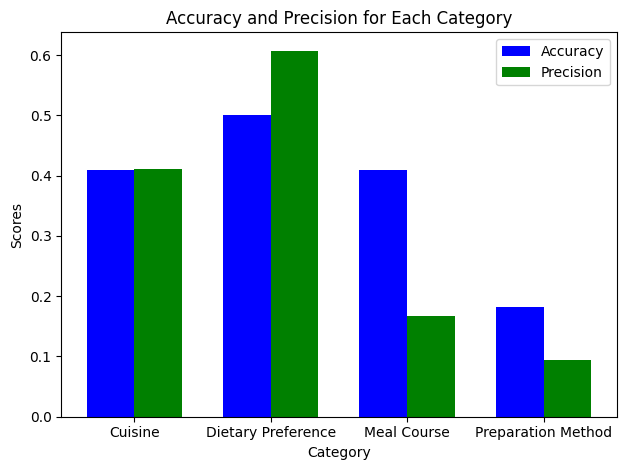

In [ ]:
food_item = input("Enter a food item: ")
predictions = predict_food_details(food_item)
print(f"\nPredictions for '{food_item}':")
for key, value in predictions.items():
    print(f"  {key}: {value}")

cuisine_accuracy = accuracy_score(y_test_cuisine, model_cuisine.predict(X_test))
dietary_accuracy = accuracy_score(y_test_dietary, model_dietary.predict(X_test))
meal_course_accuracy = accuracy_score(y_test_meal_course, model_meal_course.predict(X_test))
prepare_accuracy = accuracy_score(y_test_prepare,model_prepare.predict(X_test))

cuisine_precision = precision_score(y_test_cuisine, model_cuisine.predict(X_test), average='weighted',zero_division='warn')
dietary_precision = precision_score(y_test_dietary, model_dietary.predict(X_test), average='weighted',zero_division='warn')
meal_course_precision = precision_score(y_test_meal_course, model_meal_course.predict(X_test), average='weighted',zero_division='warn')
prepare_precision = precision_score(y_test_prepare,model_prepare.predict(X_test),average='weighted',zero_division='warn')

print(f"\nAccuracy:")
print(f"  Cuisine: {cuisine_accuracy:.4f}")
print(f"  Dietary Preference: {dietary_accuracy:.4f}")
print(f"  Meal Course: {meal_course_accuracy:.4f}")
print(f"  Preparation Method: {prepare_accuracy:.4f}")

print(f"\nPrecision:")
print(f"  Cuisine: {cuisine_precision:.4f}")
print(f"  Dietary Preference: {dietary_precision:.4f}")
print(f"  Meal Course: {meal_course_precision:.4f}")
print(f"  Preparation Method: {prepare_precision:.4f}")

accuracy_scores = [cuisine_accuracy, dietary_accuracy, meal_course_accuracy, prepare_accuracy]
precision_scores = [cuisine_precision, dietary_precision, meal_course_precision, prepare_precision]

categories = ['Cuisine', 'Dietary Preference', 'Meal Course', 'Preparation Method']
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(categories))
accuracy_bar = plt.bar(index, accuracy_scores, bar_width, color='b', label='Accuracy')
precision_bar = plt.bar(index + bar_width, precision_scores, bar_width, color='g', label='Precision')

plt.xlabel('Category')
plt.ylabel('Scores')
plt.title('Accuracy and Precision for Each Category')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

plt.tight_layout()
plt.show()